In [1]:
# Basic Imports
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
# Preprocessing tools
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
# Deep learning tols
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn import set_config
set_config(transform_output='pandas')



In [2]:
# Load data from your path
df = pd.read_csv("heart - heart.csv")
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [5]:
# Explore and clean the data if needed. 
df.isna().sum()  # 0 
df.duplicated().sum() # 0 

0

In [6]:
#Perform a train-test split on your data.
# Define X and y
target = 'HeartDisease'
X = df.drop(columns = target)
y = df[target]
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [10]:
#  Create the preprocessing pipeline for numeric data
numeric_columns=X_train.select_dtypes("number").columns
# Scaler
scaler=StandardScaler()
numeric_pipe= make_pipeline(scaler)
# Make the tuple for ColumnTransformer
numeric_tuple= ("numarical",numeric_pipe ,numeric_columns )
print(numeric_tuple)

('numarical', Pipeline(steps=[('standardscaler', StandardScaler())]), Index(['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak'], dtype='object'))


In [11]:
# Create the preprocessing pipeline for categorical  data
categorical_columns =X_train.select_dtypes("object").columns
#OneHotEncoder
oht_categorical = OneHotEncoder(drop="if_binary", sparse_output=False )
# Instantiate the pipeline
categorical_pipeline= make_pipeline(oht_categorical)
# Make the tuple for ColumnTransformer
categorical_tuple= ("categorical" , categorical_pipeline , categorical_columns)


In [12]:
preprocessing_Column= ColumnTransformer([numeric_tuple,categorical_tuple],  remainder="drop", verbose_feature_names_out=False)
preprocessing_Column

ColumnTransformer(transformers=[('numarical',
                                 Pipeline(steps=[('standardscaler',
                                                  StandardScaler())]),
                                 Index(['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak'], dtype='object')),
                                ('categorical',
                                 Pipeline(steps=[('onehotencoder',
                                                  OneHotEncoder(drop='if_binary',
                                                                sparse_output=False))]),
                                 Index(['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope'], dtype='object'))],
                  verbose_feature_names_out=False)

In [14]:
X_train_tf =  preprocessing_Column.fit_transform(X_train)
X_test_tf =  preprocessing_Column.transform(X_test)

In [16]:
# Define your base sequential model.  
model  = Sequential()

In [19]:

# Step 1: Define our network structure
# Save the number of features we have as our input shape
x_shape =  X_train_tf.shape[1]
x_shape

18

In [20]:
# First hidden layer
model.add(Dense(18 , activation='relu',input_dim = x_shape ))
# Second hidden layer
model.add(Dense(10 , activation='relu'))

#output layer 
model.add(Dense(1 ,activation='sigmoid'))


In [21]:
#Compile your model with the correct loss function and an optimizer 
model.compile(loss='bce', optimizer = 'adam' , metrics=['accuracy', tf.keras.metrics.Recall(name='Recall') , tf.keras.metrics.Precision(name='Precision')])

In [22]:
                     
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 18)                342       
                                                                 
 dense_1 (Dense)             (None, 10)                190       
                                                                 
 dense_2 (Dense)             (None, 1)                 11        
                                                                 
Total params: 543
Trainable params: 543
Non-trainable params: 0
_________________________________________________________________


In [25]:
# Custom function for plotting each metric
def plot_history(history, figsize=(6,12), marker='o'):
       
    # Get list of metrics from history
    metrics = [c for c in history.history if not c.startswith('val_')]
    
    ## Separate row for each metric
    fig, axes = plt.subplots(nrows=len(metrics),figsize=figsize)
    
    # For each metric
    for i, metric_name in enumerate(metrics):
    
        # Get the axis for the current metric
        ax = axes[i]
    
        # Get metric from history.history
        metric_values = history.history[metric_name]
        # Get epochs from history
        epochs = history.epoch
    
        # Plot the training metric
        ax.plot(epochs, metric_values, label=metric_name, marker=marker)
    
        ## Check if val_{metric} exists. if so, plot:
        val_metric_name = f"val_{metric_name}"
        if val_metric_name in history.history:
            # Get validation values and plot
            metric_values = history.history[val_metric_name]
            ax.plot(epochs,metric_values,label=val_metric_name, marker=marker)
    
        # Final subplot adjustments 
        ax.legend()
        ax.set_title(metric_name)
    fig.tight_layout()

    return fig, axes

In [26]:
# Step 3: Fit our model
history = model.fit(X_train_tf, y_train,
                    validation_split= 0.2, 
                    epochs=15)


Epoch 1/15
18/18 [==============================] - 2s 24ms/step - loss: 0.6158 - accuracy: 0.7255 - Recall: 0.8084 - Precision: 0.7302 - val_loss: 0.5999 - val_accuracy: 0.7609 - val_Recall: 0.8824 - val_Precision: 0.7059
Epoch 2/15
18/18 [==============================] - 0s 4ms/step - loss: 0.5680 - accuracy: 0.8055 - Recall: 0.8409 - Precision: 0.8170 - val_loss: 0.5524 - val_accuracy: 0.7826 - val_Recall: 0.8971 - val_Precision: 0.7262
Epoch 3/15
18/18 [==============================] - 0s 4ms/step - loss: 0.5203 - accuracy: 0.8218 - Recall: 0.8571 - Precision: 0.8302 - val_loss: 0.5084 - val_accuracy: 0.7899 - val_Recall: 0.8824 - val_Precision: 0.7407
Epoch 4/15
18/18 [==============================] - 0s 4ms/step - loss: 0.4787 - accuracy: 0.8364 - Recall: 0.8734 - Precision: 0.8406 - val_loss: 0.4685 - val_accuracy: 0.7899 - val_Recall: 0.8676 - val_Precision: 0.7468
Epoch 5/15
18/18 [==============================] - 0s 4ms/step - loss: 0.4406 - accuracy: 0.8382 - Recall: 0.8

(<Figure size 600x1200 with 4 Axes>,
 array([<Axes: title={'center': 'loss'}>,
        <Axes: title={'center': 'accuracy'}>,
        <Axes: title={'center': 'Recall'}>,
        <Axes: title={'center': 'Precision'}>], dtype=object))

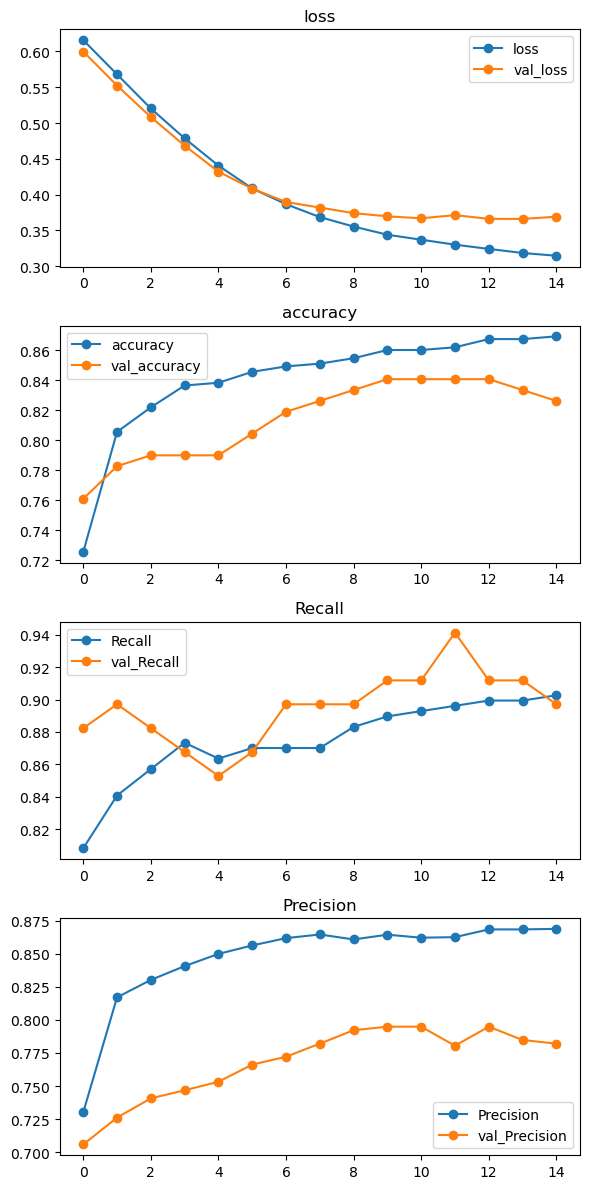

In [27]:
plot_history(history)

In [32]:
y_prad_test=  model.predict(X_test_tf)
y_prad_test[:5]
y_prad_test=np.round(y_prad_test)
y_prad_test[:5]

8/8 [==============================] - 0s 2ms/step


array([[0.],
       [0.],
       [1.],
       [1.],
       [0.]], dtype=float32)

              precision    recall  f1-score   support

           0       0.83      0.85      0.84        98
           1       0.88      0.87      0.88       132

    accuracy                           0.86       230
   macro avg       0.86      0.86      0.86       230
weighted avg       0.86      0.86      0.86       230



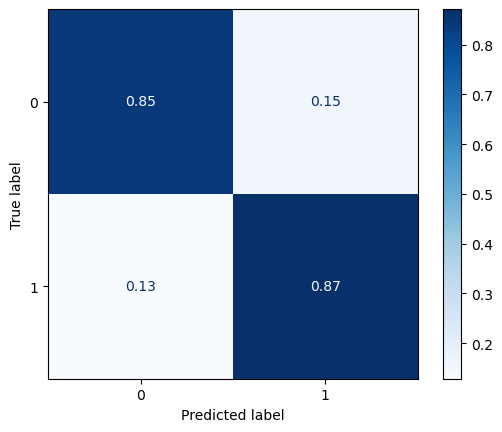

In [37]:
from sklearn.metrics import ConfusionMatrixDisplay , classification_report
print(classification_report(y_test,y_prad_test))
ConfusionMatrixDisplay.from_predictions(y_test,y_prad_test, cmap='Blues',
                                       normalize='true');


 # try 2 more versions of it with different numbers of layers and neurons

In [40]:
# Sequential model
model2 = Sequential()

# First hidden layer
model2.add(Dense(30, # How many neurons you have in your first hidden layer
                input_dim = x_shape, # What is the shape of your input features (number of columns)
                activation = 'relu')) # What activation function are you using?
# Second hidden layer
model2.add(Dense(10, # How many neurons you have in your second hidden layer
                activation = 'relu')) # What activation function are you using
model2.add(Dense( 5,activation = 'relu'))
# Output layer
model2.add(Dense(1, activation = 'sigmoid'))

In [41]:
#Compile your model with the correct loss function and an optimizer 
model2.compile(loss='bce', optimizer = 'adam' , metrics=['accuracy', tf.keras.metrics.Recall(name='Recall') , tf.keras.metrics.Precision(name='Precision')])

In [45]:
# Step 3: Fit our model
history = model2.fit(X_train_tf, y_train,
                    validation_split= 0.2, 
                    epochs=15)

Epoch 1/15
18/18 [==============================] - 0s 11ms/step - loss: 0.2894 - accuracy: 0.8873 - Recall: 0.9123 - Precision: 0.8892 - val_loss: 0.3941 - val_accuracy: 0.8333 - val_Recall: 0.9118 - val_Precision: 0.7848
Epoch 2/15
18/18 [==============================] - 0s 4ms/step - loss: 0.2893 - accuracy: 0.8782 - Recall: 0.8831 - Precision: 0.8977 - val_loss: 0.3957 - val_accuracy: 0.8333 - val_Recall: 0.9118 - val_Precision: 0.7848
Epoch 3/15
18/18 [==============================] - 0s 4ms/step - loss: 0.2866 - accuracy: 0.8818 - Recall: 0.9156 - Precision: 0.8785 - val_loss: 0.4063 - val_accuracy: 0.8333 - val_Recall: 0.9118 - val_Precision: 0.7848
Epoch 4/15
18/18 [==============================] - 0s 4ms/step - loss: 0.2822 - accuracy: 0.8873 - Recall: 0.8961 - Precision: 0.9020 - val_loss: 0.3897 - val_accuracy: 0.8333 - val_Recall: 0.8971 - val_Precision: 0.7922
Epoch 5/15
18/18 [==============================] - 0s 4ms/step - loss: 0.2766 - accuracy: 0.8855 - Recall: 0.9

In [46]:
y_prad_test2=  model2.predict(X_test_tf)
y_prad_test2[:5]
y_prad_test2=np.round(y_prad_test2)
y_prad_test2[:5]

8/8 [==============================] - 0s 2ms/step


array([[0.],
       [0.],
       [1.],
       [1.],
       [0.]], dtype=float32)

              precision    recall  f1-score   support

           0       0.82      0.88      0.85        98
           1       0.90      0.86      0.88       132

    accuracy                           0.87       230
   macro avg       0.86      0.87      0.86       230
weighted avg       0.87      0.87      0.87       230



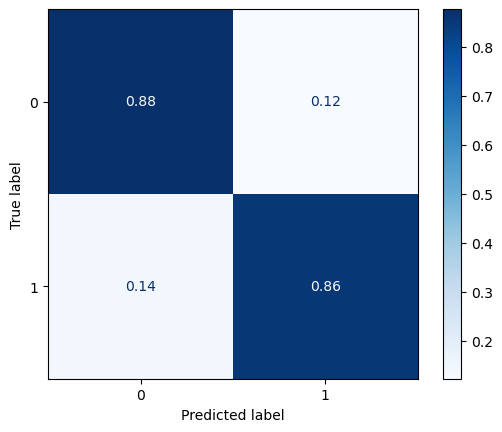

In [44]:
from sklearn.metrics import ConfusionMatrixDisplay , classification_report
print(classification_report(y_test,y_prad_test2))
ConfusionMatrixDisplay.from_predictions(y_test,y_prad_test2, cmap='Blues',
                                       normalize='true');


In [63]:
# Sequential model
model3 = Sequential()

# First hidden layer
model3.add(Dense( 20 ,
                input_dim = x_shape, # What is the shape of your input features (number of columns)
                activation = 'relu')) # What activation function are you using?
# Second hidden layer
model3.add(Dense(5, # How many neurons you have in your second hidden layer
                activation = 'relu')) # What activation function are you using
model3.add(Dense( 5,activation = 'relu'))
# Output layer
model3.add(Dense(1, activation = 'sigmoid'))

In [64]:
#Compile your model with the correct loss function and an optimizer 
model3.compile(loss='bce', optimizer = 'adam' , metrics=['accuracy', tf.keras.metrics.Recall(name='Recall') , tf.keras.metrics.Precision(name='Precision')])

In [65]:
# Step 3: Fit our model
history = model3.fit(X_train_tf, y_train,
                    validation_split= 0.2, 
                    epochs=20)

Epoch 1/20
18/18 [==============================] - 2s 29ms/step - loss: 0.6591 - accuracy: 0.5636 - Recall: 0.9838 - Precision: 0.5632 - val_loss: 0.6636 - val_accuracy: 0.4928 - val_Recall: 1.0000 - val_Precision: 0.4928
Epoch 2/20
18/18 [==============================] - 0s 5ms/step - loss: 0.6254 - accuracy: 0.5600 - Recall: 0.9838 - Precision: 0.5611 - val_loss: 0.6418 - val_accuracy: 0.4855 - val_Recall: 0.9853 - val_Precision: 0.4891
Epoch 3/20
18/18 [==============================] - 0s 7ms/step - loss: 0.5931 - accuracy: 0.5691 - Recall: 0.9870 - Precision: 0.5661 - val_loss: 0.6230 - val_accuracy: 0.5217 - val_Recall: 0.9853 - val_Precision: 0.5076
Epoch 4/20
18/18 [==============================] - 0s 7ms/step - loss: 0.5638 - accuracy: 0.5764 - Recall: 0.9740 - Precision: 0.5714 - val_loss: 0.6095 - val_accuracy: 0.5580 - val_Recall: 0.9853 - val_Precision: 0.5276
Epoch 5/20
18/18 [==============================] - 0s 7ms/step - loss: 0.5359 - accuracy: 0.7291 - Recall: 0.9

In [66]:
y_prad_test3 = model3.predict(X_test_tf)
y_prad_test3[:5]
y_prad_test3=  np.round(y_prad_test3)

8/8 [==============================] - 0s 3ms/step


              precision    recall  f1-score   support

           0       0.81      0.84      0.82        98
           1       0.88      0.86      0.87       132

    accuracy                           0.85       230
   macro avg       0.84      0.85      0.85       230
weighted avg       0.85      0.85      0.85       230



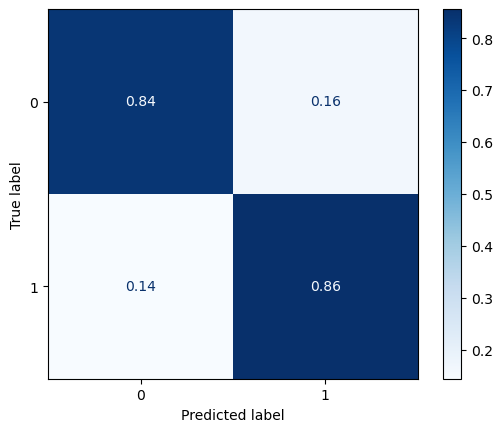

In [67]:
print(classification_report(y_test,y_prad_test3))
ConfusionMatrixDisplay.from_predictions(y_test,y_prad_test3, cmap='Blues',
                                       normalize='true');
